In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('./ClaimCars/training_set_fd.csv', delimiter=';')
df.head()

c:\Users\dany0\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,claim_number,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,38301,1,1,Rent,Friday,Local,1,Broker,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0
1,3,21,F,0.0,30445,0,1,Rent,Thursday,Highway,1,Online,2966.024895,4.0,Large,29429.45218,white,28691.96422,0
2,4,49,F,0.0,38923,0,1,Own,Tuesday,Local,0,Broker,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1
3,5,58,F,1.0,40605,1,0,Own,Thursday,Local,3,Broker,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1
4,6,38,M,1.0,36380,1,0,Rent,Tuesday,Highway,0,Broker,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17998 entries, 0 to 17997
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   claim_number        17998 non-null  int64  
 1   age_of_driver       17998 non-null  int64  
 2   gender              17998 non-null  object 
 3   marital_status      17993 non-null  float64
 4   annual_income       17998 non-null  int64  
 5   high_education_ind  17998 non-null  int64  
 6   address_change_ind  17998 non-null  int64  
 7   living_status       17998 non-null  object 
 8   claim_day_of_week   17998 non-null  object 
 9   accident_site       17998 non-null  object 
 10  past_num_of_claims  17998 non-null  int64  
 11  channel             17998 non-null  object 
 12  claim_est_payout    17981 non-null  float64
 13  age_of_vehicle      17990 non-null  float64
 14  vehicle_category    17998 non-null  object 
 15  vehicle_price       17998 non-null  float64
 16  vehi

Numero istanze dataset:  17998
Sono presenti missing values?  True
Numero di missing values:  30
Numero di missing values per attributo:  claim_number           0
age_of_driver          0
gender                 0
marital_status         5
annual_income          0
high_education_ind     0
address_change_ind     0
living_status          0
claim_day_of_week      0
accident_site          0
past_num_of_claims     0
channel                0
claim_est_payout      17
age_of_vehicle         8
vehicle_category       0
vehicle_price          0
vehicle_color          0
vehicle_weight         0
fraud                  0
dtype: int64
Il dataset è bilanciato rispetto a 'fraud'?  False


<AxesSubplot:title={'center':'Count (fraud)'}>

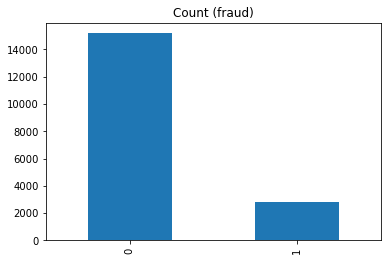

In [4]:
print("Numero istanze dataset: ", len(df))
print("Sono presenti missing values? ", df.isnull().values.any())
print("Numero di missing values: ", df.isnull().sum().sum())
print("Numero di missing values per attributo: ", df.isnull().sum())
print("Il dataset è bilanciato rispetto a 'fraud'? ", df['fraud'].value_counts()[0] == df['fraud'].value_counts()[1])
df['fraud'].value_counts().plot(kind='bar', title='Count (fraud)')

In [5]:
df_age=df.loc[df['age_of_driver']<91]
age_group = pd.cut(df_age['age_of_driver'], bins=[17, 21, 25, 30,40, 50, 90])

In [6]:
age_group.value_counts()

(40, 50]    5768
(30, 40]    5064
(50, 90]    4712
(25, 30]    1584
(21, 25]     716
(17, 21]     128
Name: age_of_driver, dtype: int64

<AxesSubplot:>

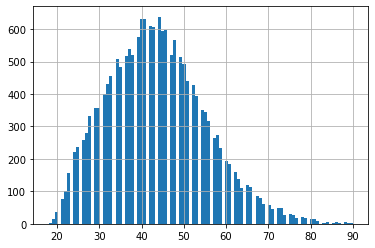

In [7]:
df_age['age_of_driver'].hist(bins=100)

C:\Users\dany0\AppData\Local\Temp\ipykernel_11272\1632709738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['age_group'] = age_group


fraud,0,1
age_group,,
"(17, 21]",0.781250,0.218750
"(21, 25]",0.857542,0.142458
"(25, 30]",0.843434,0.156566
"(30, 40]",0.829581,0.170419
"(40, 50]",0.805652,0.194348
"(50, 90]",0.904711,0.095289


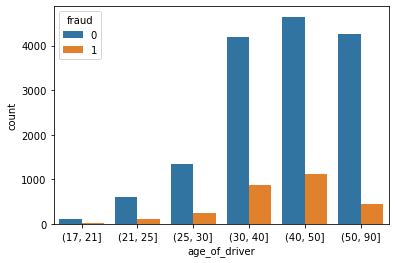

In [8]:
sns.countplot(x=age_group, hue='fraud', data=df_age)
df_age['age_group'] = age_group
df_age.groupby('age_group')['fraud'].value_counts(normalize=True).unstack()

In [44]:
df_under= df.loc[df['age_of_driver']<40]
df_over= df.loc[df['age_of_driver']>=40]
df_under_fro = df_under.loc[df['fraud']==1].groupby('gender').count()['claim_number']
df_over_fro = df_over.loc[df['fraud']==1].groupby('gender').count()['claim_number']
df_u_f = df_under_fro['F']/df_under[df_under['gender']=='F'].count()['gender']
df_u_m = df_under_fro['M']/df_under[df_under['gender']=='M'].count()['gender']
df_o_f = df_over_fro['F']/df_over[df_over['gender']=='F'].count()['gender']
df_o_m = df_over_fro['M']/df_over[df_over['gender']=='M'].count()['gender']
print("Percentuale frodi donne sotto i 40 anni: ", df_u_f)
print("Percentuale frodi uomini sotto i 40 anni: ", df_u_m)
print("Percentuale frodi donne sopra i 40 anni: ", df_o_f)
print("Percentuale frodi uomini sopra i 40 anni: ", df_o_m)

Percentuale frodi donne sotto i 40 anni:  0.17992766726943943
Percentuale frodi uomini sotto i 40 anni:  0.1487977369165488
Percentuale frodi donne sopra i 40 anni:  0.16974661840350544
Percentuale frodi uomini sopra i 40 anni:  0.1360381861575179


In [47]:
print(df_under.groupby('gender')['fraud'].value_counts(normalize=True).unstack())
print(df_over.groupby('gender')['fraud'].value_counts(normalize=True).unstack())

fraud          0         1
gender                    
F       0.820072  0.179928
M       0.851202  0.148798
fraud          0         1
gender                    
F       0.830253  0.169747
M       0.863962  0.136038


<AxesSubplot:>

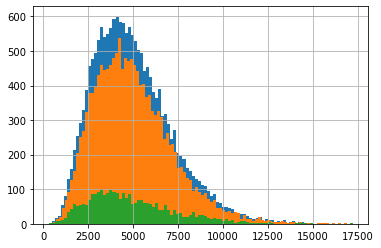

In [10]:
df['claim_est_payout'].hist(bins=100)
df.loc[df['fraud']==0]['claim_est_payout'].hist(bins=100)
df.loc[df['fraud']==1]['claim_est_payout'].hist(bins=100)


In [11]:
df =  pd.read_csv('./ClaimCars/training_set_fd.csv', delimiter=';')
df = df.dropna()
data_text=df.drop(['claim_number', 'vehicle_color', 'vehicle_weight', 'marital_status', 'fraud'], axis=1)
data_label=df['fraud']

In [12]:
data_text.head()

,age_of_driver,gender,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price
0,46,M,38301,1,1,Rent,Friday,Local,1,Broker,7530.940993,9.0,Compact,12885.45235
1,21,F,30445,0,1,Rent,Thursday,Highway,1,Online,2966.024895,4.0,Large,29429.45218
2,49,F,38923,0,1,Own,Tuesday,Local,0,Broker,6283.888333,3.0,Compact,21701.18195
3,58,F,40605,1,0,Own,Thursday,Local,3,Broker,6169.747994,4.0,Medium,13198.27344
4,38,M,36380,1,0,Rent,Tuesday,Highway,0,Broker,4541.387150,7.0,Medium,38060.21122


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categoricals = data_text.select_dtypes(include='object').columns
for col in categoricals:
    data_text[col] = le.fit_transform(data_text[col])

X_train, X_test, y_train, y_test = train_test_split(data_text, data_label, test_size=1/3)
data_text.shape


(17968, 14)

In [14]:
data_text.head()

,age_of_driver,gender,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price
0,46,1,38301,1,1,1,0,1,1,0,7530.940993,9.0,0,12885.45235
1,21,0,30445,0,1,1,4,0,1,1,2966.024895,4.0,1,29429.45218
2,49,0,38923,0,1,0,5,1,0,0,6283.888333,3.0,0,21701.18195
3,58,0,40605,1,0,0,4,1,3,0,6169.747994,4.0,2,13198.27344
4,38,1,36380,1,0,1,5,0,0,0,4541.387150,7.0,2,38060.21122


In [15]:
# from sklearn.preprocessing import OrdinalEncoder


# enc = OrdinalEncoder()
# data = enc.fit_transform(data_text)
# data = pd.DataFrame(data, columns=data_text.columns)
# data.head()

Tree:                precision    recall  f1-score   support

           0       0.85      0.84      0.85      5021
           1       0.23      0.24      0.23       969

    accuracy                           0.75      5990
   macro avg       0.54      0.54      0.54      5990
weighted avg       0.75      0.75      0.75      5990

Logreg:                precision    recall  f1-score   support

           0       0.84      1.00      0.91      5021
           1       0.00      0.00      0.00       969

    accuracy                           0.84      5990
   macro avg       0.42      0.50      0.46      5990
weighted avg       0.70      0.84      0.76      5990

Dummy:                precision    recall  f1-score   support

           0       0.84      1.00      0.91      5021
           1       0.00      0.00      0.00       969

    accuracy                           0.84      5990
   macro avg       0.42      0.50      0.46      5990
weighted avg       0.70      0.84      0.76      5

c:\Users\dany0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dany0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dany0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


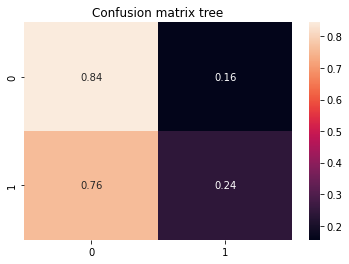

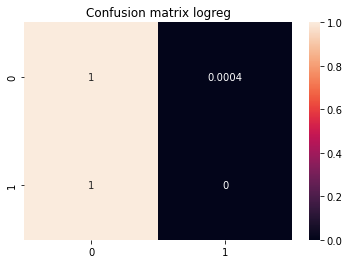

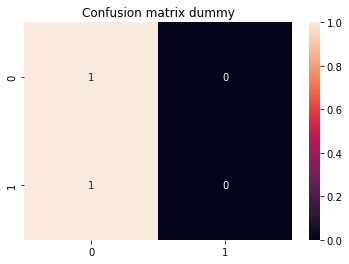

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

tree = DecisionTreeClassifier()
logreg = LogisticRegression(solver='liblinear')
dummy = DummyClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("Tree: ", classification_report(y_test, y_pred_tree))
cm_tree = confusion_matrix(y_test, y_pred_tree, normalize='true')

logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logreg: ", classification_report(y_test, y_pred_logreg))
cm_logreg = confusion_matrix(y_test, y_pred_logreg, normalize='true')

dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
print("Dummy: ", classification_report(y_test, y_pred_dummy))
cm_dummy = confusion_matrix(y_test, y_pred_dummy, normalize='true')

sns.heatmap(cm_tree, annot=True)
plt.title('Confusion matrix tree')  
plt.show()
sns.heatmap(cm_logreg, annot=True)
plt.title('Confusion matrix logreg')
plt.show()
sns.heatmap(cm_dummy, annot=True)
plt.title('Confusion matrix dummy')
plt.show()



In [17]:
from sklearn.model_selection import cross_val_score

scores_tree = cross_val_score(tree, data_text, data_label, cv=10, scoring='f1')
scores_logreg = cross_val_score(logreg, data_text, data_label, cv=10, scoring='f1')
scores_dummy = cross_val_score(dummy, data_text, data_label, cv=10, scoring='f1')

print("Tree: ", scores_tree.mean())
print("Logreg: ", scores_logreg.mean())
print("Dummy: ", scores_dummy.mean())


Tree:  0.21321695560894013
Logreg:  0.0
Dummy:  0.0


In [18]:
from sklearn.model_selection import GridSearchCV


logreg = LogisticRegression(solver='liblinear', max_iter=1000)
param_grid = {'C': [10, 100], 'penalty': ['l1', 'l2']}
logreg_cv = GridSearchCV(logreg, param_grid, cv=10, scoring='f1')
logreg_cv.fit(data_text, data_label)
print("Tuned hyperparameters: ", logreg_cv.best_params_)
print("Best score: ", logreg_cv.best_score_)

KeyboardInterrupt: 

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
data_text['claim_est_payout'] = discretizer.fit_transform(data_text['claim_est_payout'].values.reshape(-1, 1))
data_text['vehicle_price'] = discretizer.fit_transform(data_text['vehicle_price'].values.reshape(-1, 1))

scaler = MaxAbsScaler()
data_text = scaler.fit_transform(data_text)




In [ ]:
scores_tree = cross_val_score(tree, data_text, data_label, cv=10, scoring='f1')
scores_logreg = cross_val_score(logreg, data_text, data_label, cv=10, scoring='f1')
scores_dummy = cross_val_score(dummy, data_text, data_label, cv=10, scoring='f1')

print("Tree: ", scores_tree.mean())
print("Logreg: ", scores_logreg.mean())
print("Dummy: ", scores_dummy.mean())


Tree:  0.21598660235860184
Logreg:  0.024218024385331598
Dummy:  0.0


In [ ]:


df =  pd.read_csv('./ClaimCars/training_set_fd.csv', delimiter=';')

df = df.dropna()

data_text=df.drop(['claim_number', 'vehicle_color', 'vehicle_weight', 'marital_status', 'fraud'], axis=1)

data_label=df['fraud']
categoricals = data_text.select_dtypes(include='object').columns
for col in categoricals:
    data_text[col] = le.fit_transform(data_text[col])

data_text.head()

,age_of_driver,gender,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price
0,46,1,38301,1,1,1,0,1,1,0,7530.940993,9.0,0,12885.45235
1,21,0,30445,0,1,1,4,0,1,1,2966.024895,4.0,1,29429.45218
2,49,0,38923,0,1,0,5,1,0,0,6283.888333,3.0,0,21701.18195
3,58,0,40605,1,0,0,4,1,3,0,6169.747994,4.0,2,13198.27344
4,38,1,36380,1,0,1,5,0,0,0,4541.387150,7.0,2,38060.21122


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline

def identity(X):
  return X


Identity = FunctionTransformer(identity, validate=True)

transf = ColumnTransformer([('payout_discretizer', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform'), ['claim_est_payout']),
                            ('vehicle_price_discretizer', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform'),['vehicle_price'])])

union = FeatureUnion([('identity', Identity), ('transformer', transf)])


In [ ]:
from sklearn.metrics import f1_score
pipe = Pipeline([('union', union), ('logreg', logreg)])

pipe.fit(data_text, data_label)
y_pred = pipe.predict(data_text)
print("Logreg: ", f1_score(data_label, y_pred))

Logreg:  0.0


In [ ]:
from sklearn.feature_selection import SelectKBest

pipe = Pipeline([('transformer', union), ('feature_selection', SelectKBest(k=2)), ('logreg', logreg)])

param_grid = { 'transformer__transformer__payout_discretizer__n_bins': [5, 10, 15],
                'transformer__transformer__vehicle_price_discretizer__n_bins': [5, 10, 15],
                'feature_selection__k': [1, 2, 3, 4, 5, 6, 7, 8, 9]}
grid = GridSearchCV(pipe, param_grid, cv=10, scoring='f1')
grid.fit(data_text, data_label)
print("Tuned hyperparameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Tuned hyperparameters:  {'feature_selection__k': 5, 'transformer__transformer__payout_discretizer__n_bins': 5, 'transformer__transformer__vehicle_price_discretizer__n_bins': 5}
Best score:  0.02015659724234347
